In [1]:
import pandas as pd
import numpy as np

### Importing dataset

In [2]:
df = pd.read_csv("Heart.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


### Performing data analysis

In [4]:
df.shape

(303, 15)

### Checking for null values

In [5]:
# checking for null values
df.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [6]:
#total null values in the data set
df.isna().sum().sum()

6

### Finding data type of each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [8]:
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

### Finding number of zero's 

In [9]:
(df==0).sum(axis=0)

Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            176
Thal            0
AHD             0
dtype: int64

### Replacing missing values 

In [10]:
# fill the value of column Ca with mean, because Ca is float data type
df['Ca'].fillna(value=df['Ca'].mean, inplace=True)

In [11]:
# fill the value of column Thal with mode value, because Thal is object
df['Thal'].fillna(value=df['Thal'].mode, inplace=True)

In [12]:
df.isna().sum().sum()

0

### Finding mean age

In [13]:
print("Mean age is: ",df['Age'].mean())

Mean age is:  54.43894389438944


### Visualization

In [14]:
import matplotlib.pyplot as plt

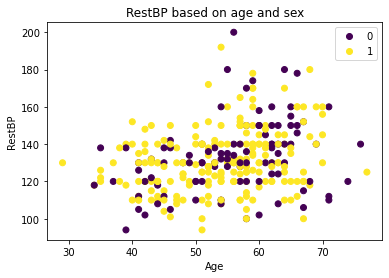

In [15]:
#visulizaing data for restbp based on age and sex
s = plt.scatter(df.Age, df.RestBP, c=df.Sex, label="RestBP")
plt.xlabel('Age')
plt.ylabel('RestBP')
plt.title("RestBP based on age and sex")
plt.legend(s.legend_elements()[0], list(set(df.Sex)))
plt.show()

## Label encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df['ChestPain'] = labelEncoder.fit_transform(df['ChestPain'])

labelEncoder = LabelEncoder()
df['AHD'] = labelEncoder.fit_transform(df['AHD'])

## Data spliting

In [17]:
X = df[['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol']]
X.head()

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,3,145,233
1,67,1,0,160,286
2,67,1,0,120,229
3,37,1,1,130,250
4,41,0,2,130,204


In [18]:
Y = df['AHD']
Y.head()

0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int32

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=100, test_size=0.25)

In [21]:
print("X train shape: ", x_train.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (227, 5)
X test shape:  (76, 5)
Y train shape:  (227,)
Y test shape:  (76,)


## Confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from numpy import array

In [23]:
cm = array([[45, 55], [5, 395]])

<AxesSubplot:>

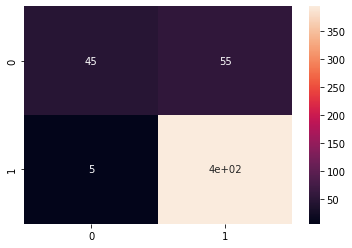

In [24]:
sns.heatmap(cm, annot=True)

## Scores

In [25]:
total = cm.sum()

#  accuracy is not a good metric when the data set is unbalanced
accuracy = np.diag(cm).sum() / total
print("Accuracy = ", accuracy)

# precision should be close to 1
precision = cm[0][0] / cm.sum(axis=1)[0]
print("Precision = ", round(precision, 4))

# recall should ideally be 1
# axis 1 means row wise, while axis 0 means column wise
recall = cm[0][0] / cm.sum(axis=0)[0]
print("Recall = ", recall)

# So ideally in a good classifier, we want both precision and recall to be one which also means FP and FN are zero. 
# Therefore we need a metric that takes into account both precision and recall. F1-score is a metric which takes 
# into account both precision and recall
f1 = 2 * ((precision*recall)/(precision+recall))
print("F1 score = ", round(f1, 3))

Accuracy =  0.88
Precision =  0.45
Recall =  0.9
F1 score =  0.6
